# Of all renewable energy types creating fuel, which have seen the most growth over five years?
### Data source: data.UN.org Energy Statistics Database

## i.Data Cleansing

### i.a. Combining & Merging

#### I used the 'unique' function to find out which variables in this dataset are useful, and found "Final consumption" to be a good place to start for each energy type.

#### All of the energy types are in separate csv files but have the same column headers, so they are easy to merge using the map function.

In [288]:
#combining all datasets in the nonrenewables file using map function

import glob
import pandas as pd 

df = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_renewable/*.csv')))
df.rename(columns={'Country or Area':'Geo'}, inplace=True)

#split commodity and transaction into two columns
#defining column to split and which delimiter
ct = df['Commodity - Transaction'].str.split('-')

#assigning new columns
df['Commodity'] = ct.str.get(0)
df['Transaction'] = ct.str.get(1)

#lowercase and remove trailing and leading spaces
df['Commodity'] = df['Commodity'].str.lower()
df['Commodity'] = df['Commodity'].str.strip()

df['Transaction'] = df['Transaction'].str.lower()
df['Transaction'] = df['Transaction'].str.strip()

df.head(5)



,Geo,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,Commodity,Transaction
0,Armenia,Animal waste - Production,2018.0,Terajoules,1289.328,NaN,animal waste,production
1,Armenia,Animal waste - Production,2017.0,Terajoules,2427.783,NaN,animal waste,production
2,Armenia,Animal waste - Production,2016.0,Terajoules,2195.136,NaN,animal waste,production
3,Armenia,Animal waste - Production,2015.0,Terajoules,1307.467,NaN,animal waste,production
4,Armenia,Animal waste - Production,2014.0,Terajoules,82.000,NaN,animal waste,production


In [289]:
#now is this dataset large enough to meet the requirement of 25,000 rows 

print(df.shape)
print('Yes, dataset has > 25,000 rows')

(269072, 8)
Yes, dataset has > 25,000 rows


In [290]:
df.Transaction.unique()

array(['production', 'imports', 'exports', 'final energy consumption',
       'consumption by other', 'consumption by households',
       'total energy supply', 'final consumption',
       'consumption in agriculture, forestry and fishing',
       'consumption by manufacturing, construction and non',
       'consumption by other manuf., const. and non',
       'consumption not elsewhere specified (industry)',
       'consumption by food and tobacco', 'consumption by non',
       'consumption not elsewhere specified (other)', 'transformation',
       'other transformation',
       'transformation in electricity, chp and heat plants',
       'transformation in electricity plants', nan,
       'transformation in chp plants',
       'consumption by chemical and petrochemical',
       'consumption by paper, pulp and print',
       'consumption by wood and wood products', 'stock changes',
       'energy industries own use', 'other energy industry own use',
       'non', 'consumption in trans

In [291]:
#filter by 2018 and type 'final consumption'

df_2018_fc = df.loc[(df['Year'] == 2018) & (df['Transaction'].str.contains("final consumption")) , :]
df_2018_fc.sample(10)



,Geo,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,Commodity,Transaction
1427,Azerbaijan,Charcoal - Final consumption,2018.0,"Metric tons, thousand",0.10,NaN,charcoal,final consumption
6928,Slovakia,Municipal wastes - final consumption,2018.0,Terajoules,90.00,NaN,municipal wastes,final consumption
5853,Malawi,Industrial waste - Final consumption,2018.0,Terajoules,50.00,1.0,industrial waste,final consumption
2913,Cambodia,Brown coal - final consumption,2018.0,"Metric tons, thousand",115.00,NaN,brown coal,final consumption
18629,Serbia,Brown coal - final consumption,2018.0,"Metric tons, thousand",786.00,NaN,brown coal,final consumption
2346,France,Biogasoline - Final consumption,2018.0,"Metric tons, thousand",856.00,NaN,biogasoline,final consumption
1988,Bangladesh,Charcoal - Final consumption,2018.0,"Metric tons, thousand",338.35,1.0,charcoal,final consumption
3097,China,Bagasse - Final consumption,2018.0,"Metric tons, thousand",38160.00,1.0,bagasse,final consumption
26635,Saudi Arabia,Charcoal - Final consumption,2018.0,"Metric tons, thousand",10.00,NaN,charcoal,final consumption
13245,Netherlands,Brown coal - final consumption,2018.0,"Metric tons, thousand",40.00,NaN,brown coal,final consumption


In [292]:
df_2018_elec = df.loc[(df['Year'] > 2000) & (df['Commodity'].str.contains("Elec")) , :]
df_2018_elec.Transaction.unique()

array([], dtype=object)

#### ** There is no final consumption data for geothermal, hydro, solar, tide, wave, and wind.  Only production.  This analysis will have to happen separately and be combined in a total production analysis

In [293]:
#Apply string manipulation to electricity datasets to correctly populate electricity type into commodity and "total production" as transaction

# import pandas as pd 

# df_elec = df[df['Commodity'].str.contains("elec")]
# elecsplit = df_elec['Transaction'].str.split(' ')

# #assigning new columns
# df_elec['electype'] = elecsplit.str.get(2)



# for elec in df_elec[df_elec['Commodity'] == 'Electricity'] :
#     df_elec['Commodity'] = df_elec['electype']
#     df_elec['Transaction'] = (elecsplit.str.get(1) + ' ' + elecsplit.str.get(3))
    
# df_elec.sample(10)


## ii.Renewables Types

## iii.Renewables Metrics
#### iii.a. Overall change from 2013 to 2018

In [294]:
df_2013_fc= df.loc[(df['Year'] == 2013) & (df['Transaction'].str.contains("Final consumption")) , :]
df_2018_fc = df.loc[(df['Year'] == 2018) & (df['Transaction'].str.contains("Final consumption")) , :]


df_2018_fc['percent_change'] = ((df_2018_fc['Quantity'].sum() - df_2013_fc['Quantity'].sum()) / df_2013_fc['Quantity'].sum())*100

print('2013 total renewables Quantity (varying units):' + str(df_2013_fc['Quantity'].sum().round()))
print('2018 total renewables: Quantity (varying units):' + str(df_2018_fc['Quantity'].sum().round()))
print('-')
print('There was a ' + str(percent_change.round(2)) + '%' + ' increase in all renewables from 2013 to 2018 worldwide.')

2013 total renewables Quantity (varying units):0.0
2018 total renewables: Quantity (varying units):0.0
-
There was a -11.64% increase in all renewables from 2013 to 2018 worldwide.


In [295]:
# #getting a group
# com_grp = df.groupby(['Commodity'])
# com_grp.get_group('animal waste')

# #fitering - split, then locate
# filt = (df['Commodity'] == 'animal waste')
# df.loc[filt]['Quantity'].value_counts()


In [296]:
trans_grp = df.groupby(['Transaction'])
trans_grp.get_group('total energy supply')

,Geo,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,Commodity,Transaction
24,Armenia,Animal waste - Total energy supply,2018.0,Terajoules,1289.328,NaN,animal waste,total energy supply
25,Armenia,Animal waste - Total energy supply,2017.0,Terajoules,2427.783,NaN,animal waste,total energy supply
26,Armenia,Animal waste - Total energy supply,2016.0,Terajoules,2195.136,NaN,animal waste,total energy supply
27,Armenia,Animal waste - Total energy supply,2015.0,Terajoules,1307.467,NaN,animal waste,total energy supply
28,Armenia,Animal waste - Total energy supply,2014.0,Terajoules,82.000,NaN,animal waste,total energy supply
...,...,...,...,...,...,...,...,...
2542,Ukraine,Peat products - Total energy supply,1994.0,"Metric tons, thousand",800.000,NaN,peat products,total energy supply
2543,Ukraine,Peat products - Total energy supply,1993.0,"Metric tons, thousand",1244.000,NaN,peat products,total energy supply
2544,Ukraine,Peat products - Total energy supply,1992.0,"Metric tons, thousand",1916.000,NaN,peat products,total energy supply
2580,USSR (former),Peat products - Total energy supply,1991.0,"Metric tons, thousand",2997.000,NaN,peat products,total energy supply


In [297]:
#creating multiple filters to get total energy supply of all types from 2018
df_tes = df[df['Transaction'] == 'final energy consumption']
df_2018_tes = df_tes[df_tes['Year'] == 2018]
df_2018_tes.head()

comm_grp = df_2018_tes.groupby(['Commodity'])
comm_grp.get_group('peat products')

,Geo,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,Commodity,Transaction
219,Belarus,Peat Products - Final energy consumption,2018.0,"Metric tons, thousand",766.10000,NaN,peat products,final energy consumption
635,Bermuda,Peat Products - Final energy consumption,2018.0,"Metric tons, thousand",0.00128,1.0,peat products,final energy consumption
1172,Ireland,Peat Products - Final energy consumption,2018.0,"Metric tons, thousand",155.00000,NaN,peat products,final energy consumption
1383,Latvia,Peat Products - Final energy consumption,2018.0,"Metric tons, thousand",1.00000,NaN,peat products,final energy consumption
1571,Lithuania,Peat Products - Final energy consumption,2018.0,"Metric tons, thousand",75.00000,NaN,peat products,final energy consumption
1993,Russian Federation,Peat Products - Final energy consumption,2018.0,"Metric tons, thousand",23.94700,NaN,peat products,final energy consumption
2348,Ukraine,Peat Products - Final energy consumption,2018.0,"Metric tons, thousand",295.00000,NaN,peat products,final energy consumption


## iv.Renewables Metrics 2018

In [298]:
sum_2018_df = comm_grp['Quantity'].agg(['sum'])
sum_2018_df.rename(columns={'sum' : 'Qty 2018'}, inplace=True)

In [299]:
#creating multiple filters to get total energy supply of all types from 2018
df_tes = df[df['Transaction'] == 'final energy consumption']
df_2013_tes = df_tes[df_tes['Year'] == 2013]
df_2013_tes.head()

comm_grp = df_2013_tes.groupby(['Commodity'])
#call on 'peat products' as an example
comm_grp.get_group('peat products')

,Geo,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,Commodity,Transaction
224,Belarus,Peat Products - Final energy consumption,2013.0,"Metric tons, thousand",714.000000,NaN,peat products,final energy consumption
640,Bermuda,Peat Products - Final energy consumption,2013.0,"Metric tons, thousand",0.002340,1.0,peat products,final energy consumption
794,Estonia,Peat Products - Final energy consumption,2013.0,"Metric tons, thousand",13.000000,NaN,peat products,final energy consumption
1177,Ireland,Peat Products - Final energy consumption,2013.0,"Metric tons, thousand",204.000000,NaN,peat products,final energy consumption
1576,Lithuania,Peat Products - Final energy consumption,2013.0,"Metric tons, thousand",76.000000,NaN,peat products,final energy consumption
1998,Russian Federation,Peat Products - Final energy consumption,2013.0,"Metric tons, thousand",61.000000,NaN,peat products,final energy consumption
2150,Singapore,Peat Products - Final energy consumption,2013.0,"Metric tons, thousand",1.716189,1.0,peat products,final energy consumption
2353,Ukraine,Peat Products - Final energy consumption,2013.0,"Metric tons, thousand",207.000000,NaN,peat products,final energy consumption


In [300]:
#same thing for 2013
sum_2013_df = comm_grp['Quantity'].agg(['sum'])
sum_2013_df.rename(columns={'sum' : 'Qty 2013'}, inplace=True)

In [303]:
#combine data frames for each year to get percentage change
renew_pc = pd.concat([sum_2013_df, sum_2018_df], axis='columns', sort=False)

In [307]:
renew_pc['change'] = renew_pc['Qty 2018'] - renew_pc['Qty 2013']
renew_pc['perc_change'] = (renew_pc['change'] / renew_pc['Qty 2013']) * 100
renew_pc.sort_values(by='perc_change', ascending=False)

,Qty 2013,Qty 2018,change,perc_change
Commodity,,,,
other liquid biofuels,5.240000e+02,8.370000e+02,313.000000,59.732824
direct use of geothermal heat,1.143126e+05,1.772017e+05,62889.135000,55.015065
biodiesel,3.117490e+04,4.724781e+04,16072.910800,51.557210
industrial waste,3.279480e+05,4.573397e+05,129391.747000,39.454958
municipal wastes,1.256780e+05,1.647870e+05,39109.000000,31.118414
direct use of solar thermal heat,2.668291e+05,3.210226e+05,54193.510000,20.310195
biogases,1.400525e+05,1.670029e+05,26950.308944,19.242998
biogasoline,6.986464e+04,8.284972e+04,12985.080880,18.586057
vegetal waste,9.819363e+06,1.031743e+07,498068.956004,5.072315


In [ ]:
#separate analysis for types of electricity generated by renewables

## v.Insights

#### This analysis studied the change in five years from 2013 to 2018:

#### "Other liquid biofuels" increased about 59%, although their quantity is quite low at 313 thousand metric tons measured worldwide.

#### Direct use of geothermal heat saw an increase of 55%

#### Biodiesel saw an increase of 51%

#### Brown coal briquettes, made of peat-like material, saw a decrease of about 20%.



AxesSubplot(0.125,0.125;0.775x0.755)


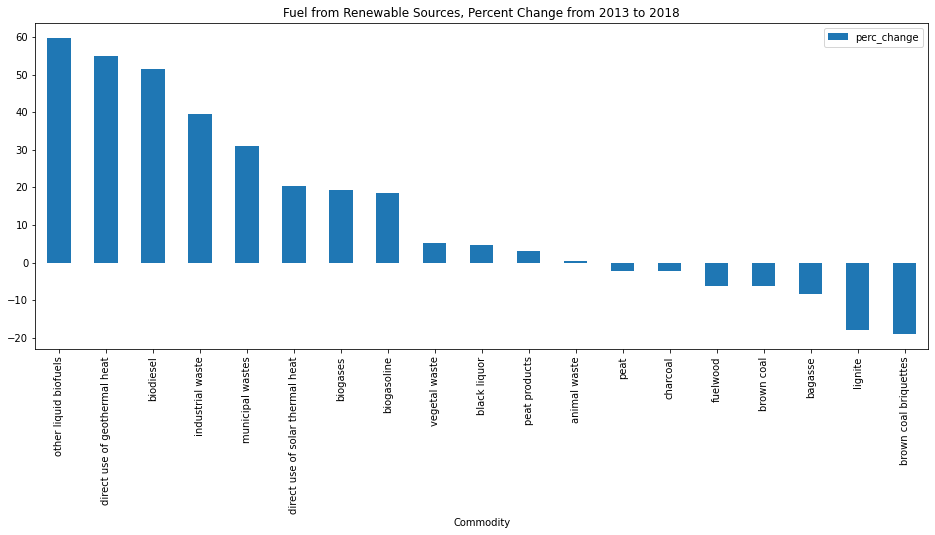

In [310]:
import matplotlib.pyplot as plt 

pc_only = renew_pc.drop(['Qty 2013', 'Qty 2018', 'change'],axis=1)
pc_only.sort_values(by='perc_change', ascending=False, inplace=True)

print(pc_only.plot(kind='bar', figsize=(16,6), title='Fuel from Renewable Sources, Percent Change from 2013 to 2018'))


AxesSubplot(0.125,0.125;0.775x0.755)


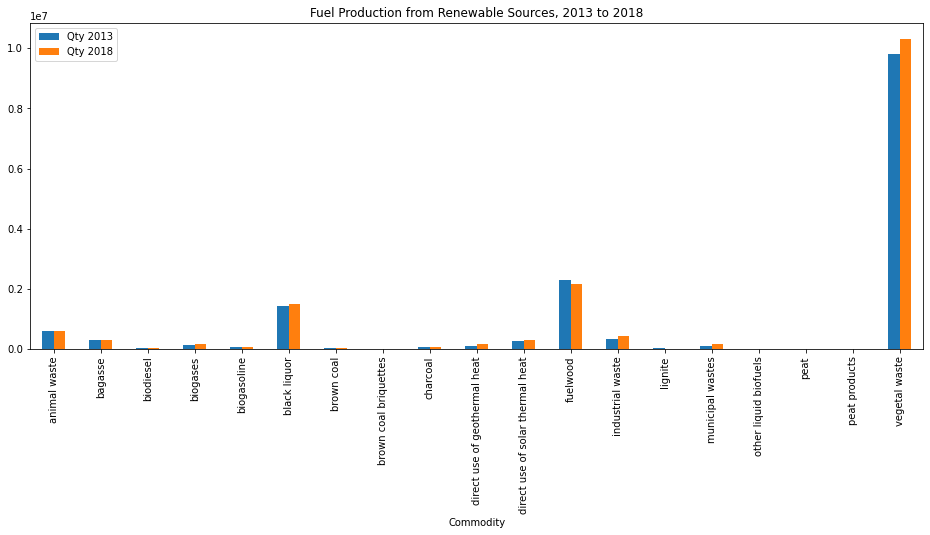

In [311]:
import matplotlib.pyplot as plt 
no_pc = renew_pc.drop(['change', 'perc_change'], axis=1)

print(no_pc.plot(kind='bar', figsize=(16,6), title='Fuel Production from Renewable Sources, 2013 to 2018'))

#separate by types of units